# ASSIGNMENT 1: MULTIPLE LINEAR REGRESSION
Import the relevant libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

## Processing the Data
Load the data

In [50]:
data = pd.read_csv('insurance.csv')

In [51]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [52]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Check for and remove duplicate rows

In [53]:
data.drop_duplicates(inplace = True)

In [54]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Remove any rows containing empty cells

In [55]:
data.dropna(inplace = True)

In [56]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Now, we convert our categorical features (sex, smoker?, region) to numerical features. For the 'sex' column, female = 0 and male = 1; and for the 'smoker' column, no = 0 and yes = 1. For the 'region' column, we create 4 columns, one for each region. If the person lives in a region, they get a 1 in that column and a 0 in the other three.

In [57]:
data = pd.get_dummies(data)

In [58]:
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


To avoid multi-collinearity, we have to drop the 'sex-female' and 'smoker_no' columns and rename the rest of columns.

In [59]:
# Drop 'sex_female' and 'smoker_no' columns
data.drop(columns=['sex_female'], axis=1, inplace=True)
data.drop('smoker_no', axis=1, inplace=True) 

# Rename remaining columns
data.rename(columns = {'sex_male': 'Gender'}, inplace = True)
data.rename(columns = {'smoker_yes': 'Smoker'}, inplace = True)
data.rename(columns = {'region_northeast': 'Northeast'}, inplace = True)
data.rename(columns = {'region_northwest': 'Northwest'}, inplace = True)
data.rename(columns = {'region_southeast': 'Southeast'}, inplace = True)
data.rename(columns = {'region_southwest': 'Southwest'}, inplace = True)

In [60]:
data

,age,bmi,children,charges,Gender,Smoker,Northeast,Northwest,Southeast,Southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


Show the relationship (correlation) between the columns.

In [61]:
data.corr()

,age,bmi,children,charges,Gender,Smoker,Northeast,Northwest,Southeast,Southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001868,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,-0.023202,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,0.005945,-0.038695,0.073578,-0.043637
Gender,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.002008,-0.012482,0.017578,-0.003767
Smoker,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,0.002597,-0.036321,0.068282,-0.037168
Northeast,0.001868,-0.138178,-0.023202,0.005945,-0.002008,0.002597,1.000000,-0.319842,-0.345909,-0.320493
Northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,-0.319842,1.000000,-0.345909,-0.320493
Southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,-0.345909,1.000000,-0.346614
Southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.320493,-0.346614,1.000000


The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

From the table above, we see that there is a high degree of correlation between being a smoker and the amount of charges (0.787234).

#### Note: Correlation does NOT imply causation.

## Building a Multiple Linear Regression: Age, Smoker? vs. Charges

In [62]:
# Create Linear Regression object
mlr = linear_model.LinearRegression()

# Fit Linear Regression
mlr.fit(data[['age','Smoker']],data['charges'])

# Get the slope and intercept of the line of best fit.
print('Slope:      ',mlr.coef_)

print('Intercept:  ',mlr.intercept_)

Slope:       [  274.77887642 23854.10191344]
Intercept:   -2386.8681946734087


### MODEL EQUATION
After fitting the linear equation, we obtain the following multiple linear regression model:

                        charges = 274.78(age) + 23854.10(Smoker) - 2386.87

Now, we create a function to predict charges based on a person's age and whether or not they smoke.

In [63]:
def predict(x1,x2):
    m1 = mlr.coef_[0]
    m2 = mlr.coef_[1]
    b = mlr.intercept_
    y = m1*x1 + m2*x2 + b
    return y

Now, we can predict the charges for a 32 year old smoker: (x1 = 32, x2 = 1)

In [64]:
print("Predict charges for a 32 year old smoker:  ", predict(32,1))

Predict charges for a 32 year old smoker:   30260.157764320473


How about a 40 year old nonsmoker: (x1 = 40, x2 = 0)

In [65]:
print("Predict charges for a 40 year old nonsmoker:  ", predict(40,0))

Predict charges for a 40 year old nonsmoker:   8604.286862272025


## 3D Model: Age, Smoker? vs Charges

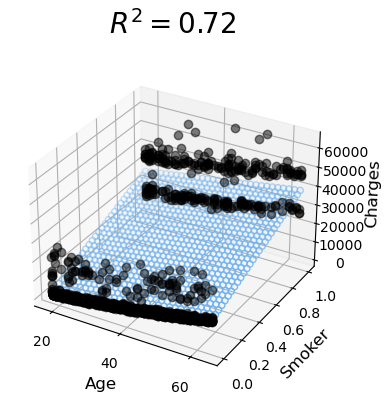

In [66]:
# From https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python
# Data Preparation
X = data[['age','Smoker']].values.reshape(-1,2)
Y = data['charges']

# Prepare model data points for visualization
x = X[:, 0]  # data points for 'age' on the x-axis
y = X[:, 1]  # data points for 'Smoker' on the y-axis
z = Y        # data points for 'charges' on the z-axis

x_pred = np.linspace(18, 64,30)  # range of 'age'
y_pred = np.linspace(0, 1, 30)   # range of 'Smoker'
xx_pred, yy_pred = np.meshgrid(x_pred,y_pred)
model_viz = np.array([xx_pred.flatten(),yy_pred.flatten()]).T

# Train
ols = linear_model.LinearRegression()
model = ols.fit(X,Y)
predicted = model.predict(model_viz)

# Evalute
r2 = model.score(X, Y)

# Plot
plt.style.use('default')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(111,projection='3d')
#ax2 = fig.add_subplot(132,projection='3d')
#ax3 = fig.add_subplot(133,projection='3d')

axes = [ax1]

for ax in axes:
    ax.plot(x,y,z,color='k',zorder=15,linestyle='none',marker='o',alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Age', fontsize=12)
    ax.set_ylabel('Smoker', fontsize=12)
    ax.set_zlabel('Charges', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

#ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#           transform=ax1.transAxes, color='grey', alpha=0.5)
#ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#           transform=ax2.transAxes, color='grey', alpha=0.5)
#ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#           transform=ax3.transAxes, color='grey', alpha=0.5)

#ax1.view_init(elev=27, azim=112)
#ax2.view_init(elev=16, azim=-51)
#ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()


In [67]:
#for ii in np.arange(0, 360, 1):
#    ax.view_init(elev=32, azim=ii)
#    fig.savefig('gif_image%d.png' % ii)
    
# The code snippet above generates 360 versions of the figure
# above. Upload the images to https://ezgif.com/maker.
# Crop the gif and download.  Move the gif file to the same
# folder as your Jupyter Notebook.  Change the cell type to
# MARKDOWN and Insert the line below: 
# <img src="FileName.gif" width="400" align="center">

<img src="6rqu5xa.gif" width="400" align="center">

## MLR Results: Age, Smoker? vs Charges

In [68]:
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1726.
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:46:25   Log-Likelihood:                -13613.
No. Observations:                1337   AIC:                         2.723e+04
Df Residuals:                    1334   BIC:                         2.725e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2386.8682    529.109     -4.511      0.000   -3424.845   -1348.891
x1           274.7789     12.470     22.036      0.000     250.317     299.241
x2          2.385e+04    433.693     55.002      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      264.751   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.592
Skew:                           1.073   Prob(JB):                    1.58e-138
Kurtosis:                       5.605   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression: All Variables

In [69]:
features = ['age','bmi','children','Gender','Smoker','Northeast','Northwest','Southeast','Southwest']
target = 'charges'

X = data[features].values.reshape(-1,len(features))
y = data[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X,y)

# Get the slope and intercept of the line of best fit.
print("Slope:          ",model.coef_)

print("Intercept:      ",model.intercept_)

# Get accuracy assessment: R^2
print("R-squared:      ",model.score(X,y))

X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()

Slope:           [  256.76461078   339.2503637    474.8204855   -129.48147837
 23847.32884379   586.1433797    236.91684814  -449.12222206
  -373.93800577]
Intercept:       -12522.700886904959
R-squared:       0.7507482551410236


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:46:37   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.002e+04    782.008    -12.811      0.000   -1.16e+04   -8484.055
x1           256.7646     11.912     21.555      0.000     233.396     280.133
x2           339.2504     28.611     11.857      0.000     283.122     395.379
x3           474.8205    137.897      3.443      0.001     204.301     745.340
x4          -129.4815    333.195     -0.389      0.698    -783.128     524.165
x5          2.385e+04    413.348     57.693      0.000     2.3e+04    2.47e+04
x6         -1918.3968    333.510     -5.752      0.000   -2572.661   -1264.133
x7         -2267.6233    334.053     -6.788      0.000   -2922.952   -1612.295
x8         -2953.6624    384.901     -7.674      0.000   -3708.743   -2198.582
x9         -2878.4782    351.002     -8.201      0.000   -3567.057   -2189.900
==============================================================================
Omnibus:                      299.816   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.552
Skew:                           1.211   Prob(JB):                    2.53e-156
Kurtosis:                       5.646   Cond. No.                     9.66e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.77e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Interpretation of Summary Results
The standard error shows the accuracy of prediction for each variable. The lower the standard error, the better the estimate. For this dataset, 'age' and 'bmi' have the lowest standard error; 11.912 and 28.611 respectively.

A P-value below 0.05 means that a variable is significant.  Based on the results of the T-statistic and its P-value, all of our variables are significant except 'Gender'; it has a P-value of 0.698. So, all of our variables, except 'Gender', are significant when predicting medical charges.

For our model, the F-statistic value is 500 and its P-value is 0.00.  This implies that the overall model is significant.  The lower the F-statistic, the more likely we are to have a non-significant model.  Interestingly, the model using 'age' and 'Smoker?' to predict charges had an F-statistic of 1726, making it a more significant model than the one using all of the variables.


### MODEL EQUATION
After fitting the linear equation, we obtain the following multiple linear regression model:

charges = 256.7646(age) + 339.2504(bmi) + 474.8205(children) - 129.4815(Gender)
        + 23847.3288(Smoker) - 1918.3968(Northeast) - 2267.6233(Northwest) - 2953.6624(Southeast)
        - 2878.4782(Southwest) - 12522.7008
        
Modifying the predict function from above, we can predict charges based on previously unseen data

In [70]:
def predict(x1,x2,x3,x4,x5,x6,x7,x8,x9):
    m1 = model.coef_[0]         
    m2 = model.coef_[1]
    m3 = model.coef_[2]
    m4 = model.coef_[3]
    m5 = model.coef_[4]
    m6 = model.coef_[5]
    m7 = model.coef_[6]
    m8 = model.coef_[7]
    m9 = model.coef_[8]
    b = model.intercept_
    y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + m6*x6 + m7*x7 + m8*x8 + m9*x9 + b
    return y

Let's make a prediction of charges when

x1 = age = 27;
x2 = bmi = 36.4;
x3 = children = 3;
x4 = Gender = 1 (male);
x5 = Smoker = 0 (non-smoker);
x6 = Northeast = 0;
x7 = Northwest = 0;
x8 = Southeast = 1;
x9 = Southwest = 0

In [71]:
print("Predict charges for a 27 year old male nonsmoker with 3 children and a bmi of 36.4 who lives \
      in the Southeast:  ",predict(27,36.4,3,1,0,0,0,1,0))

Predict charges for a 27 year old male nonsmoker with 3 children and a bmi of 36.4 who lives       in the Southeast:   7604.514598989359


Let's make a prediction of charges when

x1 = age = 86;
x2 = bmi = 22.9;
x3 = children = 8;
x4 = Gender = 0 (female);
x5 = Smoker = 1 (smoker);
x6 = Northeast = 0;
x7 = Northwest = 0;
x8 = Southeast = 0;
x9 = Southwest = 1

In [72]:
print("Predict charges for a 86 year old female smoker with 8 children and a bmi of 22.9 who lives \
      in the Southwest:  ",predict(86,22.9,8,0,1,0,0,0,1))

Predict charges for a 86 year old female smoker with 8 children and a bmi of 22.9 who lives       in the Southwest:   44599.84369102511


In [73]:
print("Predict charges for a 19 year old female smoker with 0 children and a bmi of 27.9 who lives \
      in the Southwest:  ",predict(19,27.9,0,0,1,0,0,0,1))

Predict charges for a 19 year old female smoker with 0 children and a bmi of 27.9 who lives       in the Southwest:   25294.302703226487
